In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,X-Men Origins: Wolverine,2009
1,Feng liu mi yue,1994
2,Expiation,1922
3,Snap Judgment,1917
4,Kill Command,2016


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [7]:
ten_most_common_titles = titles['title'].value_counts().head(10)
ten_most_common_titles

Hamlet                  19
Macbeth                 15
Carmen                  14
Maya                    11
Othello                 11
The Three Musketeers    11
The Outsider            11
Hero                    10
Temptation              10
Kismet                  10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [9]:
titles[titles['year'] // 10 == 193]['year'].value_counts().head(3)

1937    1187
1936    1130
1938    1125
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

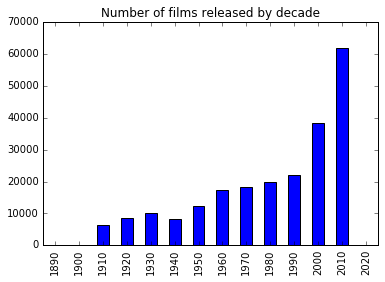

In [27]:
films_by_year = titles['year'].value_counts().sort_index()
films_by_decade = films_by_year.groupby(films_by_year.index // 10 * 10).sum()
films_by_decade.plot(kind='bar', title='Number of films released by decade')

### Plot the number of "Hamlet" films made each decade.

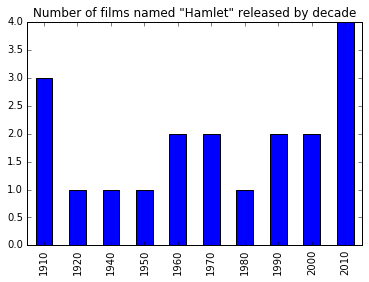

In [28]:
Hamlet_films_by_year = titles[titles['title'] == 'Hamlet']['year'].value_counts().sort_index()
Hamlet_films_by_decade = Hamlet_films_by_year.groupby(Hamlet_films_by_year.index // 10 * 10).sum()
Hamlet_films_by_decade.plot(kind='bar', title='Number of films named "Hamlet" released by decade')

### Plot the number of "Rustler" characters in each decade of the history of film.

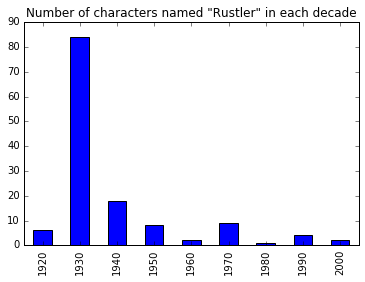

In [30]:
Rustler_characters_by_year = cast[cast['character'] == 'Rustler']['year'].value_counts().sort_index()
Rustler_characters_by_decade = Rustler_characters_by_year.groupby(Rustler_characters_by_year.index // 10 * 10).sum()
Rustler_characters_by_decade.plot(kind='bar', title='Number of characters named "Rustler" in each decade')

### Plot the number of "Hamlet" characters each decade.

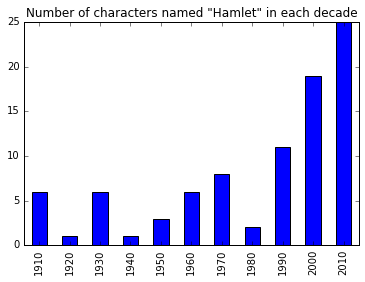

In [32]:
Hamlet_characters_by_year = cast[cast['character'] == 'Hamlet']['year'].value_counts().sort_index()
Hamlet_characters_by_decade = Hamlet_characters_by_year.groupby(Hamlet_characters_by_year.index // 10 * 10).sum()
Hamlet_characters_by_decade.plot(kind='bar', title='Number of characters named "Hamlet" in each decade')

### What are the 11 most common character names in movie history?

In [34]:
eleven_most_common_character_names = cast['character'].value_counts().head(11)
eleven_most_common_character_names

Himself        18981
Dancer         11578
Extra           9941
Reporter        7877
Doctor          7185
Student         6719
Policeman       6687
Party Guest     6459
Nurse           6394
Bartender       6358
Minor Role      6113
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [35]:
most_often_herself = cast[cast['character'] == 'Herself']['name'].value_counts().head(10)
most_often_herself

Joyce Brothers        14
Queen Elizabeth II    11
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Bunny Yeager           5
Kareena Kapoor         5
Marilyn Monroe         5
Rekha                  5
Hillary Clinton        5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [36]:
most_often_himself = cast[cast['character'] == 'Himself']['name'].value_counts().head(10)
most_often_himself

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           22
Winston Churchill        21
Benito Mussolini         20
Bill Clinton             20
Franklin D. Roosevelt    20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [38]:
most_prolific_mf_actors_1945 = cast[cast['year'] == 1945]['name'].value_counts().head(10)
most_prolific_mf_actors_1945

Emmett Vogan       39
Sam (II) Harris    30
Harold Miller      29
Bess Flowers       28
Nolan Leary        27
Frank O'Connor     26
Larry Steers       25
Franklyn Farnum    25
Herman Hack        24
Pierre Watkin      24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [39]:
most_prolific_mf_actors_1985 = cast[cast['year'] == 1985]['name'].value_counts().head(10)
most_prolific_mf_actors_1985

Mammootty        21
Shakti Kapoor    19
Sukumari         19
Mohanlal         15
Lou Scheimer     15
Raj Babbar       14
Aruna Irani      14
Rajesh Khanna    13
Deven Verma      13
Om Shivpuri      12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

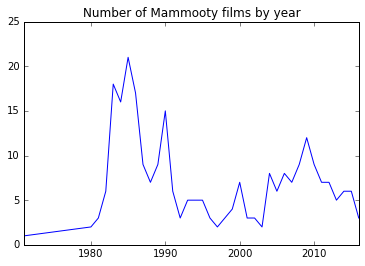

In [45]:
Mammootty_films_by_year = cast[cast['name'] == 'Mammootty']['year'].value_counts().sort_index()
Mammootty_films_by_year.plot(title='Number of Mammooty films by year')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [46]:
most_frequent_patron_in = cast[cast['character'].str.startswith('Patron in')]['character'].value_counts().head(10)
most_frequent_patron_in

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Patron in restaurant             3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [47]:
most_frequent_science = cast[cast['character'].str.startswith('Science')]['character'].value_counts().head(10)
most_frequent_science

Science Teacher         56
Science Student          9
Science Fair Student     9
Science Reporter         5
Science Club Member      5
Science Fair Judge       5
Science Promo Cadet      5
Science Kid              4
Science Fair Teacher     3
Science Fair Kid         3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

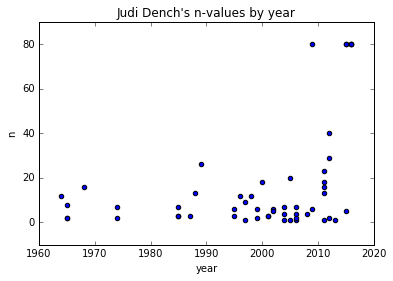

In [53]:
Judi_Dench_year_n = cast[cast['name'] == 'Judi Dench'][['year','n']].sort_values('year').fillna(80)
Judi_Dench_year_n.plot(x='year', y='n', kind='scatter', title="Judi Dench's n-values by year")

### Plot the n-values of Cary Grant's roles through his career.

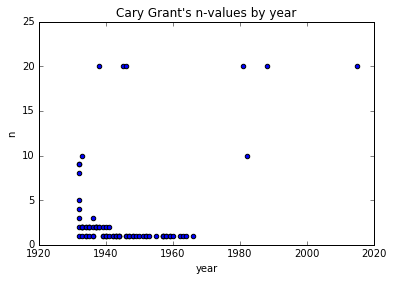

In [55]:
Cary_Grant_year_n = cast[cast['name'] == 'Cary Grant'][['year','n']].sort_values('year').fillna(20)
Cary_Grant_year_n.plot(x='year', y='n', kind='scatter', title="Cary Grant's n-values by year")

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

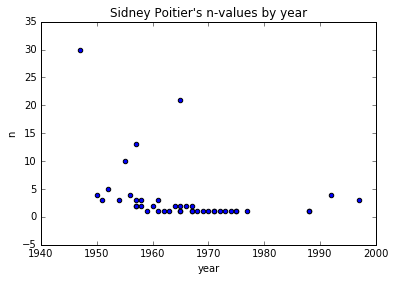

In [58]:
Sidney_Poitier_year_n = cast[cast['name'] == 'Sidney Poitier'][['year','n']].sort_values('year').fillna(30)
Sidney_Poitier_year_n.plot(x='year', y='n', kind='scatter', title="Sidney Poitier's n-values by year")

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [60]:
num_leading_actors_1950s = cast[(cast['n'] == 1) & 
                                (cast['type'] == 'actor') & 
                                (cast['year'] // 10 == 195)].shape[0]
num_leading_actresses_1950s = cast[(cast['n'] == 1) & 
                                   (cast['type'] == 'actress') & 
                                   (cast['year'] // 10 == 195)].shape[0]
print('There were {} leading roles available to actors in the 1950s'.format(num_leading_actors_1950s))
print('There were {} leading roles available to actresses in the 1950s'.format(num_leading_actresses_1950s))

There were 6494 leading roles available to actors in the 1950s
There were 2881 leading roles available to actresses in the 1950s


### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [61]:
num_n2_supporting_actors_1950s = cast[(cast['n'] == 2) & 
                                      (cast['type'] == 'actor') & 
                                      (cast['year'] // 10 == 195)].shape[0]
num_n2_supporting_actresses_1950s = cast[(cast['n'] == 2) & 
                                         (cast['type'] == 'actress') & 
                                         (cast['year'] // 10 == 195)].shape[0]
print('There were {} supporting roles (n=2) available to actors in the 1950s'.format(num_n2_supporting_actors_1950s))
print('There were {} supporting roles (n=2) available to actresses in the 1950s'.format(num_n2_supporting_actresses_1950s))

There were 4462 supporting roles (n=2) available to actors in the 1950s
There were 4481 supporting roles (n=2) available to actresses in the 1950s
